<a href="https://colab.research.google.com/github/Jessie-Grewal/Neur265/blob/main/coding_homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Homework #4

**Instructions**

1. Make a *Markdown Cell* that contains the following information:
- Your name (small header)
- The name of this class (italicized)
- The date (bolded)

2. Create a *Code Cell* that imports relevant modules - specifically, <code>pandas as pd</code>, <code>matplotlib.pyplot as plt</code>, and <code>scipy.stats as stats</code>.

3. For this assignment, you'll be using the <code>patch_seq_expanded.csv</code> file located in our class GitHub repo. Create a *Code Cell* that loads this file in as a <code>Pandas dataFrame</code> called <code>patch_seq</code>. 

4. In a new *Code Cell*, using the <code>df.plot</code> method from the <code>pandas</code> module, make a bar graph that displays the value counts (how many observations) from the "Marker" column of your <code>patch_seq</code> variable. Label your x and y-axes.

5. In a new *Code Cell*, repeat step 4, but make a pie chart instead of a bar graph.

6. In a new *Code Cell*, use a <code>for</code> loop to make a scatter plot of the "ISI" (on the x-axis) and "Fast_Trough" (on the y-axis) values in your <code>patch_seq</code> dataframe. Your loop should make data points from "Sst" neurons <font color = 'red'>red</font>, and data points from "Pvalb" neurons <font color = 'blue'>blue</font>.

7. In a new *Code Cell*, create a <code>function</code> called <code>patchScatter()</code> that will output the scatter plot created in step 6 when you call it. Don't forget to tell it to show your scatter plot!

8. In a new *Code Cell*, return the mean, standard deviation, and range of the "Fast_Trough" column for "Sst" neurons and "Pvalb" neurons. You can do this with the <code>pandas</code> method <code>describe</code>, like so:

<code>patch_seq.groupby('Marker')['Fast_Trough'].describe()</code>

9. In a new *Markdown Cell*, describe the difference in means between "Sst" neurons and "Pvalb" neurons. Which group has a more negative undershoot following an action potential? 

10. In a new *Code Cell*, return the skewness of the "Fast_Trough" column for "Sst" neurons and "Pvalb" neurons. You can do this with the <code>pandas</code> method <code>skew</code> (follow the syntax in step 8 to apply this method to <code>patch_seq</code>).

11. In a new *Markdown Cell*, interpret the results of your skewness test. Generally, values >0.5, or <-0.5, indicate a skewed distribution, while values between -0.5 and 0.5 indicate a normal distribution.

12. In a new *Code Cell*, repeat step 10 for the "ISI" column of <code>patch_seq</code>. 

13. In a new *Markdown Cell*, repeat step 11 for the "ISI" column of <code>patch_seq</code>. 

14. Finally, in a new *Code Cell*, let's perform a t-test to see if our "Fast_Trough" and "ISI" values differ between "Sst" and "Pvalb" neurons. To do this for our "Fast_Trough" values, we should first isolate each group and make each of them into a separate variable. An example of how to do this for "Sst" neurons is below:

<code>sst_neurons = patch_seq[patch_seq['Marker']=='Sst']</code>

Use the same code to create another variable called <code>pvalb_neurons</code>. Once you've made your two variables, perform an independent-samples t-test to compare "Fast_Trough" values between the two groups:

<code>stats.ttest_ind(sst_neurons['Fast_Trough'], pvalb_neurons['Fast_Trough'])</code>.

15. In a *Markdown Cell*, describe the results of your t-test. Does the undershoot voltage significantly differ betwen the two groups?

16. In a new *Code Cell*, repeat step 14 for "ISI". You won't need to create new <code>sst_neurons</code> and <code>pvalb_neurons</code> variables - you'll just need to run a new t-test. 

17. In a new *Markdown Cell*, repeat step 15 for the results of your new t-test.

18. Make sure to put a <code>#</code> in each *Code Cell* to describe what it does.

19. Save a copy of this notebook to your GitHub repo with the title <code>coding_homework_4.ipynb</code>.




### Jessie Grewal

_Neur 265: Intro to Neural Data Analysis_

Date: __3-24-2023__

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [6]:
url = 'https://raw.githubusercontent.com/hallockh/neur_265/main/patch_seq_expanded.csv'

patch_seq_df = pd.read_csv(url)
print(patch_seq_df)

           ISI  Fast_Trough Marker
0    77.337143   -49.899998    Sst
1    17.177895   -44.462498    Sst
2    48.294737   -47.350002    Sst
3     8.980000   -45.656254    Sst
4    30.315385   -50.737499    Sst
..         ...          ...    ...
360  11.052333   -54.743752  Pvalb
361   8.860360   -64.875008  Pvalb
362   9.192897   -51.312504  Pvalb
363  10.544731   -52.281254  Pvalb
364  16.396364   -61.437504  Pvalb

[365 rows x 3 columns]


In [9]:
patch_seq_df['ISI'] = patch_seq_df['ISI'].fillna(0)

<Axes: xlabel='Marker', ylabel='Number of Observations'>

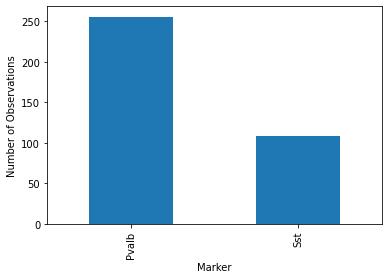

In [10]:
patch_seq_df['Marker'].value_counts().plot(kind = 'bar', xlabel = 'Marker', ylabel = 'Number of Observations')

<Axes: ylabel='Number of Observations'>

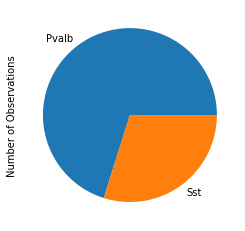

In [11]:
patch_seq_df['Marker'].value_counts().plot(kind = 'pie', xlabel = 'Marker', ylabel = 'Number of Observations')

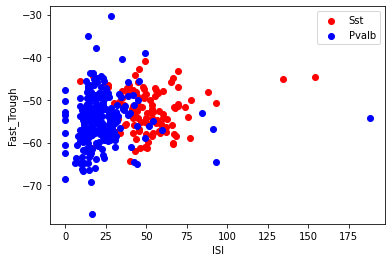

In [12]:
Marker = patch_seq_df['Marker'].unique()

fig = plt.figure()

for marker_type in Marker:

  df = patch_seq_df[patch_seq_df['Marker'] == marker_type]
  
  if marker_type == 'Sst':
    plt.scatter(df['ISI'], df['Fast_Trough'], label = marker_type, color = 'red')
  
  else: 
    plt.scatter(df['ISI'], df['Fast_Trough'], label = marker_type, color = 'blue')
  
plt.ylabel('Fast_Trough')
plt.xlabel('ISI')
plt.legend(loc = 'best')


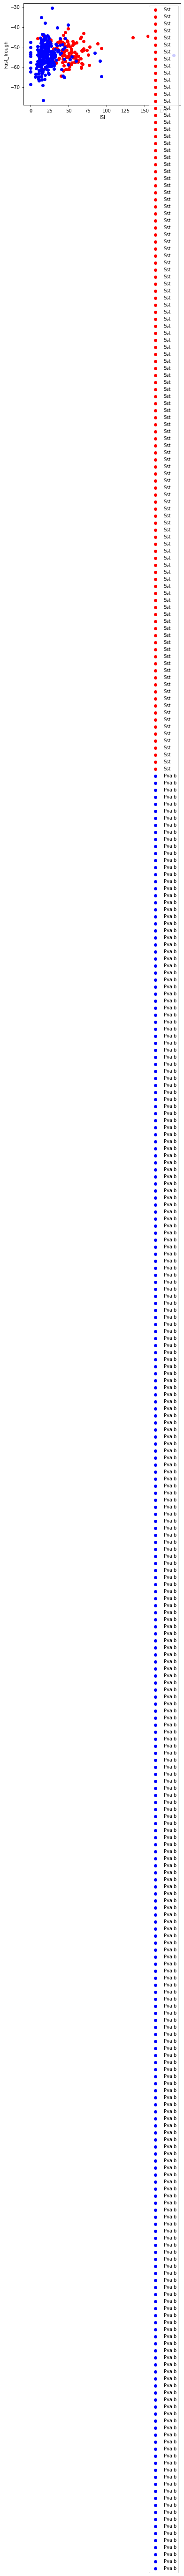

In [13]:
patch_length = len(patch_seq_df)

fig = plt.figure()

for i in range(patch_length):
  if patch_seq_df.iloc[i,2] == 'Sst':
    plt.scatter(patch_seq_df.iloc[i,0], patch_seq_df.iloc[i,1], label = (patch_seq_df.iloc[i,2]), color = 'red')
  else:
    patch_seq_df.iloc[i,2] == 'Pvalb'
    plt.scatter(patch_seq_df.iloc[i,0], patch_seq_df.iloc[i,1], label = (patch_seq_df.iloc[i,2]), color = 'blue')

plt.ylabel('Fast_Trough')
plt.xlabel('ISI')
plt.legend(loc = 'best')


In [14]:
def patchScatter():
  Marker = patch_seq_df['Marker'].unique()

  fig = plt.figure()

  for marker_type in Marker:

    df = patch_seq_df[patch_seq_df['Marker'] == marker_type]
  
    if marker_type == 'Sst':
      plt.scatter(df['ISI'], df['Fast_Trough'], label = marker_type, color = 'red')
  
    else: 
      plt.scatter(df['ISI'], df['Fast_Trough'], label = marker_type, color = 'blue')
  
  plt.ylabel('Fast_Trough')
  plt.xlabel('ISI')
  plt.legend(loc = 'best')

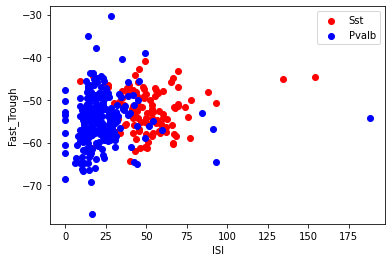

In [15]:
patchScatter()

In [16]:
patch_seq_df.groupby('Marker')['Fast_Trough'].describe()

,count,mean,std,min,25%,50%,75%,max
Marker,,,,,,,,
Pvalb,256.0,-54.548074,5.870670,-76.687508,-57.914063,-54.490629,-51.364065,-30.406252
Sst,109.0,-52.514968,4.958103,-64.375008,-55.931252,-52.568752,-48.500000,-40.781254


The average Fast_Trough value for Sst neurons is -52.5 mV, and the average Fast_Trough value for Pvalb neurons is -54.5 mV. Thus, Pvalb neurons have the more negative undershoot following an action potential. 

In [17]:
patch_seq_df.groupby('Marker')['Fast_Trough'].skew()

Marker
Pvalb    0.19536
Sst      0.00125
Name: Fast_Trough, dtype: float64

The skewness value with respect to Fast Trough values for Pvalb neurons is 0.195, and the skewness value for Sst neurons is 0.00125. Both of these values are between -0.5 and 0.5, so the Fast_Trough values for both of these groups of neurons appear to be normally distributed. 

In [18]:
patch_seq_df.groupby('Marker')['ISI'].skew()

Marker
Pvalb    5.200362
Sst      1.857850
Name: ISI, dtype: float64

The skewness value with respect to ISI values for Pvalb neurons is 5.200, and the skewness value with respect to ISI values for Sst neurons is 1.858. Since both of these values are greater than 0.5, the ISI values for both of these groups of neurons appears to have a skewed distribution. 

In [21]:
sst_neurons = patch_seq_df[patch_seq_df['Marker'] == 'Sst']
pvalb_neurons = patch_seq_df[patch_seq_df['Marker'] == 'Pvalb']

stats.ttest_ind(sst_neurons['Fast_Trough'], pvalb_neurons['Fast_Trough'])

Ttest_indResult(statistic=3.1660773376899147, pvalue=0.0016757984214133585)

Since the p value for this independent samples t-test with respect to the Fas Trough values of of Pvalb and Sst neurons was less than 0.05, the average undershoot voltage is statistically significantly different between these two groups of neurons. 

In [22]:
stats.ttest_ind(sst_neurons['ISI'], pvalb_neurons['Fast_Trough'])

Ttest_indResult(statistic=78.48343747909915, pvalue=8.69230308382599e-230)

Since the p value for this independent samples t-test with resepct to the ISI values of Pvalb and Sst neurons was greater than 0.05, the average Inter-spike interval for Pvalb and Sst neurons is not statistically significantly different. 